# Linear Regression

Linear Regression falls under the category of supervised learning, meaning that in order to create our model we need to use a training set. Linear regression is an inflexible model. Linear regression can only those model those data sets that follow a linear pattern. Inflexiblity improves the ability to infere, or understand those predictors that contribute more or less to the model. 

## Simple Linear Regression

First we assume that there exists a linear relationship between X and Y. We will describe this relationship as being approximate, and hence we use "$\approx$".

$$ Y \approx \beta_{0} + \beta_{1}X $$

Just as in any linear relationship, in this model $\beta_{0}$ represents the Y intercept and $\beta_{1}$ is the slope of the line. We do not know know what the coefficients ($\beta_{0}$ and $\beta_{1}$) are, so we have to estimate them using the training set. We will refer to the estimated coefficients as $\hat{\beta}_{0}$ and $\hat{\beta}_{1}$ and the predicted response $\hat{y}$.

$$\hat{y} \approx \hat{\beta}_{0} + \hat{\beta}_{1}X$$

### Estimating $\hat{\beta}_{0}$ and $\hat{\beta}_{1}$

The training set is used to determine the coefficients. The n observation points of the training set will be represented by:

$$(x_{1},y_{1}), (x_{2},y_{2}), ..., (x_{n},y_{n})$$

The objective is to find the closet match of the estimated coefficients to the coefficients that represent the actual linear function. The most widely used approach is that of the least squares, though there are a number of others. Using the equation $\hat{y}_{i} = \hat{\beta}_{0} + \hat{\beta}_{1}x_{i}$ to predict Y, we are left with the error e, which is the difference between the observed response value $y_{i}$ and the prediction value $\hat{y}_{i}$. This difference is called the residual. To use the least squares method, we need to add up all of the residuals in the training set. This is called the Residual Sum of Squares (RSS).

$$RSS=\hat{e}_{1}^2+\hat{e}_{2}^2+...+\hat{e}_{n}^2$$

also written as:

$$RSS=(y_{1}-\hat{\beta}_{0}-\hat{\beta}_{1}x_{1})^2 + (y_{2}-\hat{\beta}_{0}-\hat{\beta}_{1}x_{2})^2+...+(y_{n}-\hat{\beta}_{0}-\hat{\beta}_{1}x_{n})^2$$

Using the RSS equation we can solve for $\hat{\beta}_{0}$ and $\hat{\beta}_{1}$. Khan academy has a few videos that goes over the proofs for arriving at the formulas. These videos can be found starting here: https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/more-on-regression/v/squared-error-of-regression-line

$$\hat{\beta}_{1}=\sum_{i=1}^n \frac{(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum_{i=1}^n(x_{i}-\bar{x})^2}$$

$$\hat{\beta}_{0}=\bar{y}-\hat{\beta}_{1}\bar{x}$$

Where $\bar{y}$ and $\bar{x}$ are the sample means. The two equations above are significant in that they represent the minimized values of the RSS.

### Linear Regression Example

Lets use y=.5x+4 as our linear equation which of course is supposed to be the unknown function we are trying to figure out. We first will create a plot of what the function looks like.

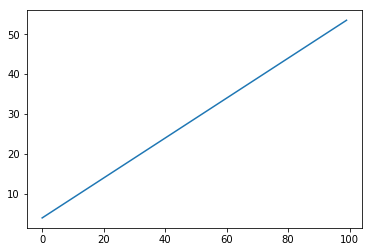

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(100)
y = .5 * x + 4
plt.plot(x,y)
plt.show()

We now use this function to create our training set. We do this by adding noise (called delta in the code) to the function. The X values remain the same but the responses will be different.

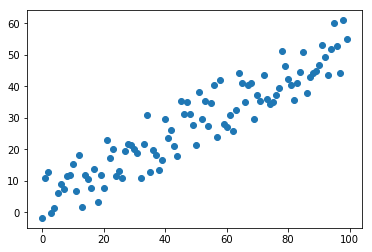

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(100)
delta = np.random.uniform(-10,10, size=(100,))
y_hat = .5 * x + 4 + delta
plt.scatter(x,y_hat)
plt.show()

As can be seen, the response is definitely linear but the two plots do not have the same responses. We will use the x array and the y_hat array as our training set. We first need to find the mean.

In [6]:
x_mean = x.mean()
y_mean = y_hat.mean()

Now we calculate $\hat{\beta}_{0}$ and $\hat{\beta}_{1}$ using the equations above.

In [7]:
beta1_hat = np.sum((x-x_mean)*(y_hat-y_mean))/np.sum(np.power((x-x_mean),2))
beta0_hat = y_mean - beta1_hat*x_mean

In [8]:
beta0_hat

4.0320882952776316

In [9]:
beta1_hat

0.48510614019606407

The coefficents $\hat{\beta}_{1}$ and $\hat{\beta}_{0}$ are clearly not exact.

Let's try this again and randomize the X values.

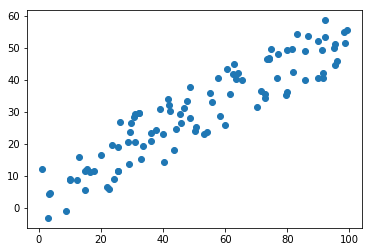

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.random.uniform(0,100, size=(100,))
delta = np.random.uniform(-10,10, size=(100,))
y_hat = .5 * x + 4 + delta
plt.scatter(x,y_hat)
plt.show()

In [11]:
x_mean = x.mean()
y_mean = y_hat.mean()
beta1_hat = np.sum((x-x_mean)*(y_hat-y_mean))/np.sum(np.power((x-x_mean),2))
beta0_hat = y_mean - beta1_hat*x_mean

In [12]:
beta0_hat

4.5944663404667843

In [13]:
beta1_hat

0.49717307152004003

The scypy package in Python has a function that will calculate the coefficients for us.

In [14]:
from scipy import stats
slope, intercept, r_value, p_value, std_error = stats.linregress(x,y_hat)

In [15]:
slope

0.49717307152004026

In [16]:
intercept

4.5944663404667736

Both beta0_hat is exactly the same as the slope variable and beta1_hat is exactly the same as the intercept.

### Averaging $\hat{\beta}_{0}$ and $\hat{\beta}_{1}$ over many data sample sets
Now what if we were to take a lot of data samples and average the slopes and intercepts from each of the data sample sets?

In [17]:
import numpy as np

size = 10
slopes = np.empty(size)
intercepts = np.empty(size)
for i in range(size):
    x = np.random.uniform(0,100, size=(100,))
    delta = np.random.uniform(-10,10, size=(100,))
    y_hat = .5 * x + 4 + delta
    slope, intercept, r_value, p_value, std_error = stats.linregress(x,y_hat)
    slopes[i] = slope
    intercepts[i] = intercept

In [18]:
slopes.mean()

0.49957301101573715

In [19]:
intercepts.mean()

4.1094309744012154

In [20]:
size = 100
slopes = np.empty(size)
intercepts = np.empty(size)
for i in range(size):
    x = np.random.uniform(0,100, size=(100,))
    delta = np.random.uniform(-10,10, size=(100,))
    y_hat = .5 * x + 4 + delta
    slope, intercept, r_value, p_value, std_error = stats.linregress(x,y_hat)
    slopes[i] = slope
    intercepts[i] = intercept

In [21]:
slopes.mean()

0.50212405781817426

In [22]:
intercepts.mean()

3.9831891256113829

In [23]:
size = 1000
slopes = np.empty(size)
intercepts = np.empty(size)
for i in range(size):
    x = np.random.uniform(0,100, size=(100,))
    delta = np.random.uniform(-10,10, size=(100,))
    y_hat = .5 * x + 4 + delta
    slope, intercept, r_value, p_value, std_error = stats.linregress(x,y_hat)
    slopes[i] = slope
    intercepts[i] = intercept

In [24]:
slopes.mean()

0.49901398481122949

In [25]:
intercepts.mean()

4.0550590223558096

In [26]:
size = 10000
slopes = np.empty(size)
intercepts = np.empty(size)
for i in range(size):
    x = np.random.uniform(0,100, size=(100,))
    delta = np.random.uniform(-10,10, size=(100,))
    y_hat = .5 * x + 4 + delta
    slope, intercept, r_value, p_value, std_error = stats.linregress(x,y_hat)
    slopes[i] = slope
    intercepts[i] = intercept

In [27]:
slopes.mean()

0.49998210625035533

In [28]:
intercepts.mean()

3.9931314705813472

### Coefficient accuracy

The more we average $\hat{\beta}_{0}$ and $\hat{\beta}_{1}$ from many data samples, the closer and closer the coefficients will approach the "unknown" function's coefficients $\beta_{0}$ and $\beta_{1}$. So what can we learn from this? What is being shown is an unbias in the estimate. There is no intent to intentionally overshoot or undershoot the individual slope or intercept.

Where $\hat{\mu}$ is the mean (average) of the samples and $\sigma$ is the standard deviation. Var($\hat{\mu}$) is the variance of the sample population. First, let's discuss the variance of the sample mean. More formally the sample variance is described by the following equation(http://mathworld.wolfram.com/Variance.html):

 $$Var(\hat{\mu}) = \frac{1}{n-1}\sum_{i=1}^n(y_{i}-\bar{y})^2$$

Looking at the equation, what can we learn about the variance? In a nutshell, we are looking at the sample spread from the mean of the response or how spread out/by how much do the samples vary (On a side note, if you want to know why the differences are squared, see the footnote at http://www.mathsisfun.com/data/standard-deviation.html). Here is the link to a very good video on the sample variance: https://www.youtube.com/watch?v=sOb9b_AtwDg (Population and Sample Variance from MathTutorDVD.com). We know that if we take the average $\hat{\mu}$ over many data sets, $\hat{\mu}$ would move closer and closer to the actual population $\mu$. Since each data set will produce its own $\hat{\mu}$, a question we could ask ourselves is by how far off an individual $\hat{\mu}$ will be from $\mu$. The Standard Error (SE) will help in answering that question. Standard errors will also help us establish a confidence interval.

$$Var(\hat{\mu}) = SE(\hat{\mu})^2 = \frac{\sigma^2}{n}$$

Standard error: https://www.youtube.com/watch?v=BwYj69LAQOI

By inspection of the equation we can see that as the standard deviation goes up, so will the standard error. In contrast as the number of observations goes up the standard error will go down.

We can extend this logic to the coefficients of our function and determine their accuracy. For the standard errors of $\hat{\beta}_{0}$ and $\hat{\beta}_{1}$ we have the following equations:

$$SE(\hat{\beta}_{0})^2 = \sigma^2[\frac{1}{n}+\frac{\bar{x}^2}{\Sigma_{i=1}^n(x_{i}-\bar{x})^2}], \space SE(\hat{\beta}_{1})^2 = \frac{{\sigma}^2}{\Sigma_{i=1}^n(x_{i}-\bar{x})^2}$$

In order for these equations to hold $\epsilon$ for each observation must be uncorrelated. $\sigma^2$ is unknown but can be estimated using the Residual Standard Error (RSE):

$$\sigma^2\approx\ RSE\ = \ \sqrt{\frac{RSS}{(n-2)}}$$

Standard errors are also used to execute hypothesis tests such as the null hypothesis test on the coefficients of the unknown function.

Null hypothesis: X has no effect on Y.

Alternative hypothesis: X has some effect on Y.

To test the null hypothesis test we need to establish that $\hat{\beta_{1}}$ is far enough from zero that we can be confident that $\hat{\beta_{1}}$ is non-zero. The standard error can be helpful in determining if $\hat{\beta_{1}}$ is far enough from zero to be considered non-zero. This is because being sufficiently far from zero depends a lot on the accuracy of $\hat{\beta_{1}}$. The t-statistic is used to compare the standard error to $\hat{\beta_{1}}$.

$$t=\frac{\hat{\beta_{1}}-\beta_{1}}{SE({\hat{\beta_{1}})}}$$

We are going to make an set $\beta_{1}$ to zero to test the null hypothesis, or in other words, we are testing to see X has no relationship with Y. So, setting $\beta_{1}=0$ we have the following t-statistic:

$$t=\frac{\hat{\beta_{1}}-0}{SE({\hat{\beta_{1}})}}$$

Really what this equation tells us is how many standard deviations $\beta_{1}$ is from 0. Now we will go through an example of calculating the t-statistic and plotting the result over many iterations.

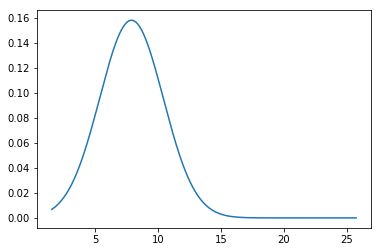

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

size = 10000
t = np.empty(size)
p = np.empty(size)
for i in range(size):
    x = np.random.uniform(0,100, size=(10,))
    delta = np.random.uniform(-10,10, size=(10,))
    y_hat = .5 * x + 4 + delta
    slope, intercept, r_value, p_value, std_error = stats.linregress(x,y_hat)
    t[i] = slope / std_error
    p[i] = p_value

t = sorted(t)
pdf = stats.norm.pdf(t, np.mean(t), np.std(t))
plt.plot(t, pdf)

The shape of the statistic follows a normal distribution. In this case the mean is about 8. 

Now that the t-statistic has been calculated we can compute the p-value which is what we are really interested in. A very small p-value is an indication that we can reject the null hypothesis, meaning that there is a high probability of a relationship between the X and Y.

In [52]:
np.mean(p)

0.0005510471820596004

Typical cutoffs of the p-value are 5% or 1% in order to reject the null hypothesis. Clearly at there is a high probability that X is related to Y in this example.

### Model Fit

Now that we know there is a high degree of likelihood that we can reject the null hypothesis for our coefficient, we need to determine the effectiveness of our model. We can use the Residual Standard Error (RSE) and the $R^2$ statistic.


The RSE measures the standard deviation of the error $\epsilon$.

$$RSE = \sqrt{\frac{RSS}{n-2}}=\sqrt{\frac{1}{n-2}\Sigma_{i=1}^n(y_{i}-\hat{y_{i}})^2}$$

In [73]:
import numpy as np
import math

n = 100

x = np.random.uniform(0,100, size=(n,))
delta = np.random.uniform(-10,10, size=(n,))
y_hat = .5 * x + 4 + delta
slope, intercept, r_value, p_value, std_error = stats.linregress(x,y_hat)

math.sqrt(np.sum(np.square(y_hat-(slope*x+intercept))) / (n - 2))

5.618658202212803

In [74]:
np.mean(y_hat)

31.454571854078573

The value of the RSS is in units of Y. The result above show us by what percentage the RSS is of the mean. The RSE shows how bad of a fit is our model.

The other useful tool for determining the accuracy of our model the $R^2$ statistic which is not units of Y but rather is a proportion. $R^2$ lets us figure out what percentage of Y can be explained by X.

$$R^2=\frac{TSS-RSS}{TSS}=1-\frac{RSS}{TSS}$$

where the Total Sum of Squares (TSS) is defined as: $TSS=\Sigma(y_{i}-\bar{y})^2$

In [77]:
math.pow(r_value,2)

0.8717181991528345

Let's run through some more examples and see how $R^2$ changes as the error changes.

In [82]:
import numpy as np
import math
error = 5
n = 100

x = np.random.uniform(0,100, size=(n,))
delta = np.random.uniform(-error,error, size=(n,))
y_hat = .5 * x + 4 + delta
slope, intercept, r_value, p_value, std_error = stats.linregress(x,y_hat)

rse = math.sqrt(np.sum(np.square(y_hat-(slope*x+intercept))) / (n - 2))
math.pow(r_value,2)

0.9599504434123102

In [84]:
import numpy as np
import math
error = 15
n = 100

x = np.random.uniform(0,100, size=(n,))
delta = np.random.uniform(-error,error, size=(n,))
y_hat = .5 * x + 4 + delta
slope, intercept, r_value, p_value, std_error = stats.linregress(x,y_hat)

rse = math.sqrt(np.sum(np.square(y_hat-(slope*x+intercept))) / (n - 2))
math.pow(r_value,2)

0.7142063168172001

In [86]:
import numpy as np
import math
error = 20
n = 100

x = np.random.uniform(0,100, size=(n,))
delta = np.random.uniform(-error,error, size=(n,))
y_hat = .5 * x + 4 + delta
slope, intercept, r_value, p_value, std_error = stats.linregress(x,y_hat)

rse = math.sqrt(np.sum(np.square(y_hat-(slope*x+intercept))) / (n - 2))
math.pow(r_value,2)

0.6349836732498763

From the previous three examples, it is interesting to see how $R^2$ changes as the error increases and decreases.

Up until now we have only considered simple linear regression. Multiple linear regression also needs to be addressed. We will give an example of multiple linear regression using two packages in Python: statsmodel, and sklearn.

In [150]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import math
error = 10
n = 10000

x = np.random.uniform(0,100, size=(n,))
z = np.random.uniform(0,100, size=(n,))
delta = np.random.uniform(-error,error, size=(n,))
y_hat = .5 * x + 4 + delta + 3 * z

d = {'x': x, 'z': z,}
X = pd.DataFrame(d)
X = sm.add_constant(X)
model = sm.OLS(y_hat, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.150e+06
Date:                Mon, 28 Aug 2017   Prob (F-statistic):               0.00
Time:                        15:33:40   Log-Likelihood:                -31717.
No. Observations:               10000   AIC:                         6.344e+04
Df Residuals:                    9997   BIC:                         6.346e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9699      0.154     25.855      0.000       3.669       4.271
x              0.5018      0.002    250.654      0.000       0.498       0.506
z              2.9998      0.002   1496.761      0.000       2.996       3.004
==============================================================================
Omnibus:                     7834.924   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              588.628
Skew:                          -0.013   Prob(JB):                    1.52e-128
Kurtosis:                       1.812   Cond. No.                         204.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import math
error = 10
n = 10000

x = np.random.uniform(0,100, size=(n,))
z = np.random.uniform(0,100, size=(n,))
delta = np.random.uniform(-error,error, size=(n,))
y_hat = .5 * x + 4 + delta + 3 * z

d = {'x': x, 'z': z}
X = pd.DataFrame(d, columns=['x','z'])

lm = linear_model.LinearRegression()
model = lm.fit(X,y_hat)
predictions = lm.predict(X)

In [154]:
#R^2
lm.score(X,y_hat)

0.99569861326365217

In [142]:
lm.coef_

array([ 0.49993206,  3.00133552])

In [151]:
lm.intercept_

3.8881956809788676

As you can see both packages do a very good job in calculating the coefficients. We will be using sklearn in future examples, though statsmodels package is nice in that the F-statistic (which will be explained further down) in included in the calculation.

One important question to answer is if all the predictors have an influence on the response. In simple linear regression we used the null hypothesis test. Similarily, we test the null hypothesis for all the predictors. This appears in the form of: $\beta_{1} = \beta_{2} = ... = \beta_{p} = 0$. This is where the F-statistic is useful. The further from one, the less likely will the null hypothesis test be true. The size of n and p will determine exactly how far from one we need to be before rejecting the null hypothesis. Though the F-statistic shows that there is a relationship between the response and at least one of the predictors. A subset of the predictors can be used to calculate the F-statistic. To determine which predictors do not have a relationship with the response will not be discussed here.

$$F=\frac{\frac{TSS-RSS}{p}}{\frac{RSS}{(n-p-1)}}$$

Up until now we have only discussed continuous independent predictors, but what about categorical predictors? Turns out that dummy variables can be used to represent the categores. Suppose we have a coin toss category which contain heads and tails. In this example we set a dummy variable to be 1 if the toss is heads and 0 if the value is tails.

$$x_{i} = \begin{cases}
\text1\hspace{10mm} if\ the\ ith\ toss\ is\ heads\\
\text0\hspace{10mm} if\ the\ ith\ toss\ is\ tails\\
\end{cases}$$

So we are left with the equation:

$$y_{i} = \beta_{0}+\beta_{i}x_{i}+\epsilon_{i} = \begin{cases}
\beta_{0} + \beta_{1} + \epsilon_{i}\hspace{10mm}\text if\ the\ ith\ toss\ is\ heads\\
\beta_{0} + \epsilon_{i}\hspace{21mm}\text if\ the\ ith\ toss\ is\ tails\\
\end{cases}$$

If there are more than two levels per category,then we will need (levels - 1) dummy variables. For example, if we have 
a category called colors with Red, Green, Blue, each of different sizes. We will need two variables to represent these three colors. The equation would assume the following form:

$$x_{i1}=\begin{cases}
1\hspace{10mm}\text if\ the\ ith\ color\ is\ red\\
0\hspace{10mm}\text if\ the\ ith\ color\ is\ not\ red\\
\end{cases}
$$

$$x_{i2}=\begin{cases}
1\hspace{10mm}\text if\ the\ ith\ color\ is\ green\\
0\hspace{10mm}\text if\ the\ ith\ color\ is\ not\ green\\
\end{cases}
$$

$$y_{i} = \beta_{0}+\beta_{1}x_{i1}+\beta_{2}x_{i2}+\epsilon_{i} = \begin{cases}
\beta_{0} + \beta_{1} + \epsilon_{i}\hspace{10mm}\text if\ the\ ith\ color\ is\ red\\
\beta_{0} + \beta_{2} + \epsilon_{i}\hspace{10mm}\text if\ the\ ith\ color\ is\ green\\
\beta_{0} + \epsilon_{i}\hspace{21mm}\text if\ the\ ith\ color\ is\ blue\\
\end{cases}$$

$\beta_{0}$ is the size of blue, $\beta_{1}$ is the difference between the size of red and blue, $\beta_{2}$ is the difference between the size of green and blue. $\beta_{0} is known as the baseline.